In [1]:
import netCDF4 as nc4
import xlrd
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as pl
#from matplotlib import mpl
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import xarray as xr
#book_apr_giu = xlrd.open_workbook('Acquipluvio_apr_giu_2019.xls')
#book_gen_mar = xlrd.open_workbook('Acquipluvio_gen_mar_2019.xls')
#book_lug_set = xlrd.open_workbook('Acquipluvio_lug_set_2019.xls')

yyyy = '2019'
yyyy_end = '2020'
# filenames for each variables
path        = '/Volumes/Extreme SSD/personal/Acqui_Meteo_station_data/data/'
pathFig     = '/Volumes/Extreme SSD/personal/Acqui_Meteo_station_data/plots/'
#a = xlrd.open_workbook(path+filename_T)
datetime_months = np.arange(yyyy+'-01', yyyy+'-12', dtype='datetime64[M]')
print(datetime_months)

['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11']


In [3]:
T_dataset_year  = []
RH_dataset_year = []
P_dataset_year  = []
RR_dataset_year = []

# loop on months of the year to read the data from netatmo
for indMonth in range(len(datetime_months)):
    
    # setting month string
    if pd.to_datetime(datetime_months[indMonth]).month < 10:
        mm = '0'+str(pd.to_datetime(datetime_months[indMonth]).month)
    else:
        mm = str(pd.to_datetime(datetime_months[indMonth]).month)
        
    print('processing '+yyyy+mm)
    
    #defining filenames to be opened
    filename_T  = 'Modulo_temperature_'+yyyy+'-'+mm+'.csv'
    filename_RH = 'Modulo_humidity_'+yyyy+'-'+mm+'.csv'
    filename_P  = 'Indoor_pressure_'+yyyy+'-'+mm+'.csv'
    filename_RR = 'Acquipluvio_rain_'+yyyy+'-'+mm+'.csv'

    # reading T data
    dat_T = pd.read_csv(path+filename_T, sep=';', header=2)
    # converting to xarray dataset
    T_dataset = dat_T.to_xarray()
    # appending to T list 
    T_dataset_year.append(T_dataset)
    
    # reading RH data
    dat_RH = pd.read_csv(path+filename_RH, sep=';', header=2)
    # converting to xarray dataset
    RH_dataset = dat_RH.to_xarray()
    # appending to RH list 
    RH_dataset_year.append(RH_dataset)

    dat_P = pd.read_csv(path+filename_P, sep=';', header=2)
    # converting to xarray dataset
    P_dataset = dat_P.to_xarray()
    # appending to P list 
    P_dataset_year.append(P_dataset)
    
    dat_RR = pd.read_csv(path+filename_RR, sep=';', header=2)
    # converting to xarray dataset
    RR_dataset = dat_RR.to_xarray()
    # appending to RR list 
    RR_dataset_year.append(RR_dataset)
# concatenating monthly datasets
T_dataset_year = xr.concat(T_dataset_year, dim='index')
P_dataset_year = xr.concat(P_dataset_year, dim='index')
RH_dataset_year = xr.concat(RH_dataset_year, dim='index')
RR_dataset_year = xr.concat(RR_dataset_year, dim='index')

processing 201901
processing 201902
processing 201903
processing 201904
processing 201905
processing 201906
processing 201907
processing 201908
processing 201909
processing 201910
processing 201911


In [19]:
time_week = pd.date_range(start=datetime.datetime(2019,1,6,0,0,0), end=datetime.datetime(2019,12,29,0,0,0), freq='7D')
print(len(time_week))
time_mon  = pd.date_range(start=datetime.datetime(2019,1,1,0,0,0), end=datetime.datetime(2019,12,31,0,0,0), freq='30D')

52


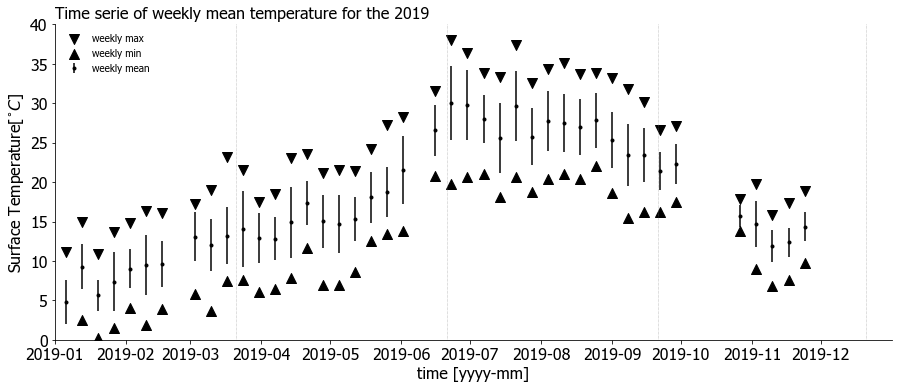

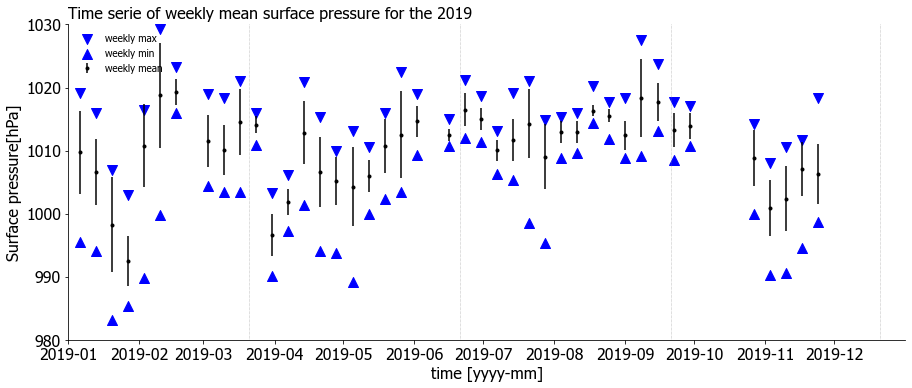

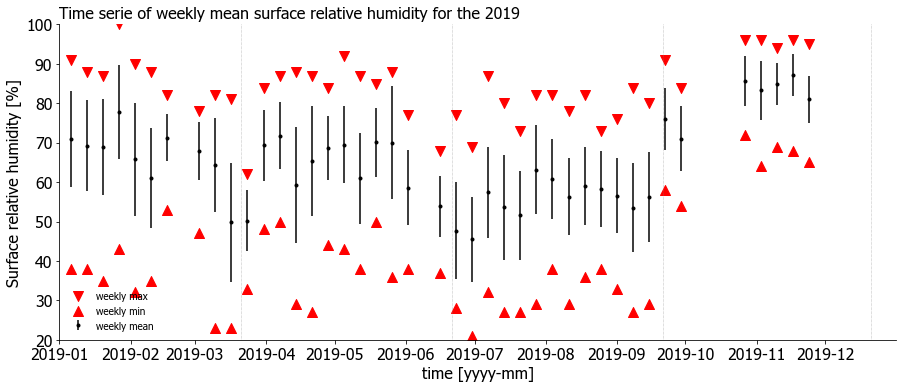

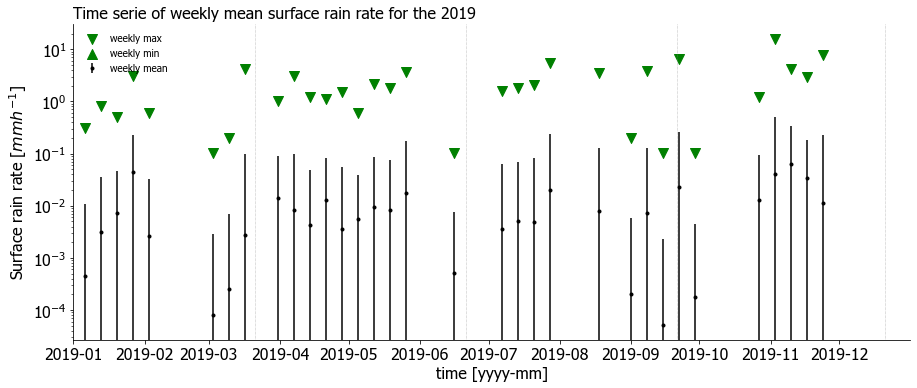

In [86]:
# loop on time week: search for time_t values in the time interval and calculate mean, median, max and min
T_mean_week = np.zeros((len(time_week)))
T_mean_week.fill(np.nan)
T_std_week = np.zeros((len(time_week)))
T_std_week.fill(np.nan)
T_min_week = np.zeros((len(time_week)))
T_min_week.fill(np.nan)
T_max_week = np.zeros((len(time_week)))
T_max_week.fill(np.nan)

P_mean_week = np.zeros((len(time_week)))
P_mean_week.fill(np.nan)
P_std_week = np.zeros((len(time_week)))
P_std_week.fill(np.nan)
P_min_week = np.zeros((len(time_week)))
P_min_week.fill(np.nan)
P_max_week = np.zeros((len(time_week)))
P_max_week.fill(np.nan)

RH_mean_week = np.zeros((len(time_week)))
RH_mean_week.fill(np.nan)
RH_std_week = np.zeros((len(time_week)))
RH_std_week.fill(np.nan)
RH_min_week = np.zeros((len(time_week)))
RH_min_week.fill(np.nan)
RH_max_week = np.zeros((len(time_week)))
RH_max_week.fill(np.nan)

RR_mean_week = np.zeros((len(time_week)))
RR_mean_week.fill(np.nan)
RR_std_week = np.zeros((len(time_week)))
RR_std_week.fill(np.nan)
RR_min_week = np.zeros((len(time_week)))
RR_min_week.fill(np.nan)
RR_max_week = np.zeros((len(time_week)))
RR_max_week.fill(np.nan)


for itime in range(len(time_week)-1):
    timeStart = time_week[itime]
    if itime == len(time_week):
        timeEnd = datetime.datetime(2019,12,31,23,59,59)
    else:
        timeEnd = time_week[itime+1]
    
    i_sel_T = np.where((time_T > timeStart) * (time_T <= timeEnd))
    i_sel_P = np.where((time_P > timeStart) * (time_P <= timeEnd))
    i_sel_RH = np.where((time_RH > timeStart) * (time_RH <= timeEnd))
    i_sel_RR = np.where((time_RR > timeStart) * (time_RR <= timeEnd))
    
    T_sel = T[i_sel_T]
    P_sel = P[i_sel_P]
    RH_sel = RH[i_sel_RH]
    RR_sel = RR[i_sel_RR]
    
    if (len(~np.isfinite(T_sel)) > 0):
        T_mean_week[itime] = np.nanmean(T_sel)
        T_std_week[itime]  = np.nanstd(T_sel)
        T_max_week[itime]  = np.nanmax(T_sel)
        T_min_week[itime]  = np.nanmin(T_sel)
        
    if (len(~np.isfinite(P_sel)) > 0):
        P_mean_week[itime] = np.nanmean(P_sel)
        P_std_week[itime]  = np.nanstd(P_sel)

        P_max_week[itime]  = np.nanmax(P_sel)
        P_min_week[itime]  = np.nanmin(P_sel)

    if (len(~np.isfinite(RH_sel)) > 0):
        RH_mean_week[itime] = np.nanmean(RH_sel)
        RH_std_week[itime]  = np.nanstd(RH_sel)
        RH_max_week[itime]  = np.nanmax(RH_sel)
        RH_min_week[itime]  = np.nanmin(RH_sel)
        
    if (len(~np.isfinite(RR_sel)) > 0):
        RR_mean_week[itime] = np.nanmean(RR_sel)
        RR_std_week[itime]  = np.nanstd(RR_sel)
        RR_max_week[itime]  = np.nanmax(RR_sel)
        RR_min_week[itime]  = np.nanmin(RR_sel)
        



fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_T, T, color='black', linewidth=0.5)
plt.errorbar(time_week, T_mean_week, yerr=T_std_week, fmt='.k', color='black', label='weekly mean')
#ax.scatter(time_week, T_mean_week, color='black', s=200, label='weekly mean')
ax.scatter(time_week, T_max_week, color='black', s=100, label='weekly max', marker="v")
ax.scatter(time_week, T_min_week, color='black', s=100, label='weekly min', marker="^")

ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,40., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(0.,40.)                                          # limits of the y-axes 
ax.legend(frameon=False)
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of weekly mean temperature for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [yyyy-mm]", fontsize=fontSizeX)
ax.set_ylabel('Surface Temperature[$^{\circ}C$]', fontsize=fontSizeY)
fig.savefig(pathFig+'weekly_mean_surface_temperature_2019.png', format='png')
#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_P, P, color='blue', linewidth=0.5)
plt.errorbar(time_week, P_mean_week, yerr=P_std_week, fmt='.k', color='blue', label='weekly mean')

#ax.scatter(time_week, P_mean_week, color='blue', s=200, label='weekly mean')
ax.scatter(time_week, P_max_week, color='blue', s=100, label='weekly max', marker="v")
ax.scatter(time_week, P_min_week, color='blue', s=100, label='weekly min', marker="^")
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,1030., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(980.,1030.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of weekly mean surface pressure for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [yyyy-mm]", fontsize=fontSizeX)
ax.legend(frameon=False)
ax.set_ylabel('Surface pressure[hPa]', fontsize=fontSizeY)
fig.savefig(pathFig+'weekly_mean_surface_pressure_2019.png', format='png')

#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_RH, RH, color='red', linewidth=0.5)
plt.errorbar(time_week, RH_mean_week, yerr=RH_std_week, fmt='.k', color='red', label='weekly mean')

#ax.scatter(time_week, RH_mean_week, color='red', s=200, label='weekly mean')
ax.scatter(time_week, RH_max_week, color='red', s=100, label='weekly max', marker="v")
ax.scatter(time_week, RH_min_week, color='red', s=100, label='weekly min', marker="^")
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,100., linestyle=':', linewidth=0.5, color='grey')
ax.legend(frameon=False)
ax.set_ylim(20.,100.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of weekly mean surface relative humidity for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [yyyy-mm]", fontsize=fontSizeX)
ax.set_ylabel('Surface relative humidity [%]', fontsize=fontSizeY)
fig.savefig(pathFig+'weekly_mean_surface_relative_humidity_2019.png', format='png')

#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_RR, RR, color='green', linewidth=0.5)
plt.errorbar(time_week, RR_mean_week, yerr=RR_std_week, fmt='.k', color='green', label='weekly mean')

#ax.scatter(time_week, RR_mean_week, color='green', s=200, label='weekly mean')
ax.scatter(time_week, RR_max_week, color='green', s=100, label='weekly max', marker="v")
ax.scatter(time_week, RR_min_week, color='green', s=100, label='weekly min', marker="^")
ax.legend(frameon=False)
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.set_yscale('log')
#ax.set_ylim(0.,1)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of weekly mean surface rain rate for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [yyyy-mm]", fontsize=fontSizeX)
ax.set_ylabel('Surface rain rate [$mmh^{-1}$]', fontsize=fontSizeY)
fig.savefig(pathFig+'weekly_mean_surface_rain_rate_2019.png', format='png')

        

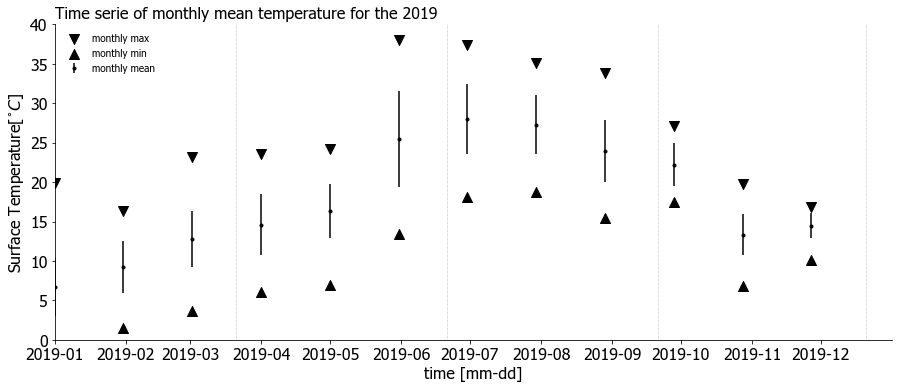

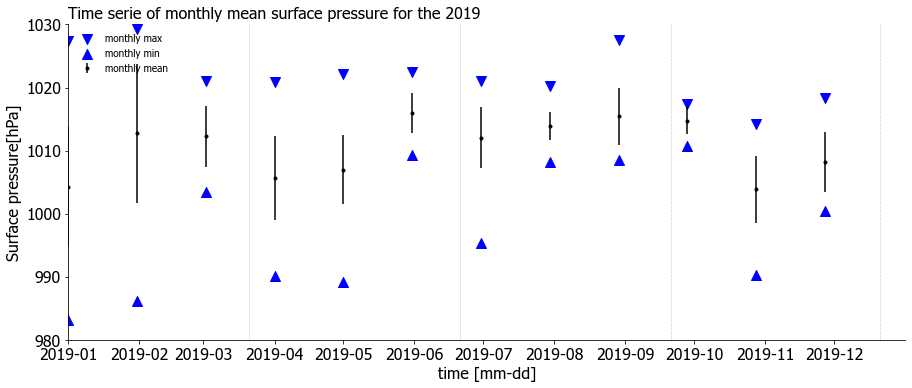

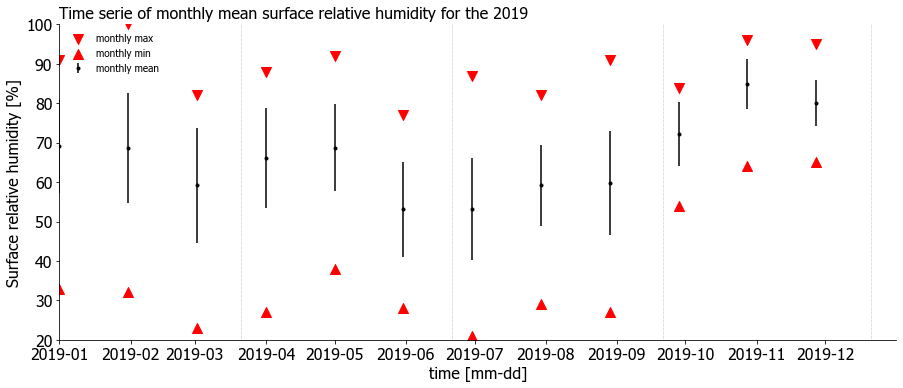

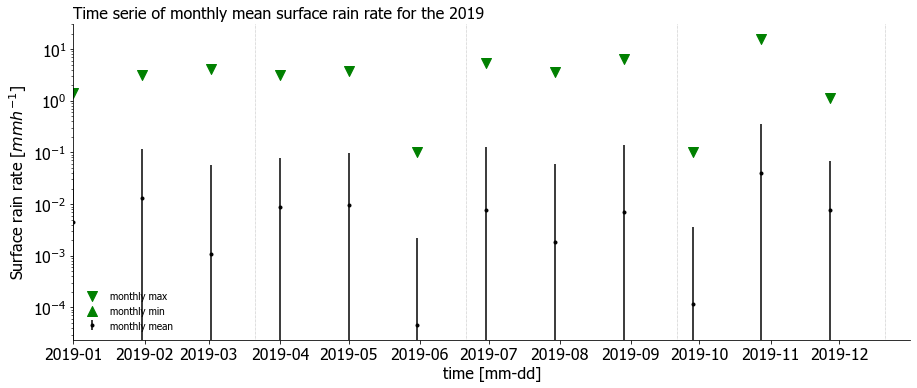

In [85]:
# loop on time month: search for time_t values in the time interval and calculate mean, median, max and min
T_mean_mon = np.zeros((len(time_mon)))
T_mean_mon.fill(np.nan)
T_std_mon = np.zeros((len(time_mon)))
T_std_mon.fill(np.nan)
T_min_mon = np.zeros((len(time_mon)))
T_min_mon.fill(np.nan)
T_max_mon = np.zeros((len(time_mon)))
T_max_mon.fill(np.nan)
P_mean_mon = np.zeros((len(time_mon)))
P_mean_mon.fill(np.nan)
P_std_mon = np.zeros((len(time_mon)))
P_std_mon.fill(np.nan)
P_min_mon = np.zeros((len(time_mon)))
P_min_mon.fill(np.nan)
P_max_mon = np.zeros((len(time_mon)))
P_max_mon.fill(np.nan)
RH_mean_mon = np.zeros((len(time_mon)))
RH_mean_mon.fill(np.nan)
RH_std_mon = np.zeros((len(time_mon)))
RH_std_mon.fill(np.nan)
RH_min_mon = np.zeros((len(time_mon)))
RH_min_mon.fill(np.nan)
RH_max_mon = np.zeros((len(time_mon)))
RH_max_mon.fill(np.nan)
RR_mean_mon = np.zeros((len(time_mon)))
RR_mean_mon.fill(np.nan)
RR_std_mon = np.zeros((len(time_mon)))
RR_std_mon.fill(np.nan)
RR_min_mon = np.zeros((len(time_mon)))
RR_min_mon.fill(np.nan)
RR_max_mon = np.zeros((len(time_mon)))
RR_max_mon.fill(np.nan)


for itime in range(len(time_mon)-1):
    timeStart = time_mon[itime]
    if itime == len(time_mon):
        timeEnd = datetime.datetime(2019,12,31,23,59,59)
    else:
        timeEnd = time_mon[itime+1]
    
    i_sel_T = np.where((time_T > timeStart) * (time_T <= timeEnd))
    i_sel_P = np.where((time_P > timeStart) * (time_P <= timeEnd))
    i_sel_RH = np.where((time_RH > timeStart) * (time_RH <= timeEnd))
    i_sel_RR = np.where((time_RR > timeStart) * (time_RR <= timeEnd))
    
    T_sel = T[i_sel_T]
    P_sel = P[i_sel_P]
    RH_sel = RH[i_sel_RH]
    RR_sel = RR[i_sel_RR]
    
    if (len(~np.isfinite(T_sel)) > 0):
        T_mean_mon[itime] = np.nanmean(T_sel)
        T_std_mon[itime] = np.nanstd(T_sel)
        T_max_mon[itime]  = np.nanmax(T_sel)
        T_min_mon[itime]  = np.nanmin(T_sel)
        
    if (len(~np.isfinite(P_sel)) > 0):
        P_mean_mon[itime] = np.nanmean(P_sel)
        P_std_mon[itime] = np.nanstd(P_sel)

        P_max_mon[itime]  = np.nanmax(P_sel)
        P_min_mon[itime]  = np.nanmin(P_sel)
        
    if (len(~np.isfinite(RH_sel)) > 0):
        RH_mean_mon[itime] = np.nanmean(RH_sel)
        RH_std_mon[itime] = np.nanstd(RH_sel)
        RH_max_mon[itime]  = np.nanmax(RH_sel)
        RH_min_mon[itime]  = np.nanmin(RH_sel)
        
    if (len(~np.isfinite(RR_sel)) > 0):
        RR_mean_mon[itime] = np.nanmean(RR_sel)
        RR_std_mon[itime] = np.nanstd(RR_sel)
        RR_max_mon[itime]  = np.nanmax(RR_sel)
        RR_min_mon[itime]  = np.nanmin(RR_sel)
        

labelsizeaxes   = 16
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16


fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_T, T, color='black', linewidth=0.5)
plt.errorbar(time_mon, T_mean_mon, yerr=T_std_mon, fmt='.k', color='black', label='monthly mean')

#ax.scatter(time_mon, T_mean_mon, color='black', s=200, label='weekly mean')
ax.scatter(time_mon, T_max_mon, color='black', s=100, label='monthly max', marker="v")
ax.scatter(time_mon, T_min_mon, color='black', s=100, label='monthly min', marker="^")

ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 40., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,40., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(0.,40.)                                          # limits of the y-axes 
ax.legend(frameon=False)
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of monthly mean temperature for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface Temperature[$^{\circ}C$]', fontsize=fontSizeY)
fig.savefig(pathFig+'monthly_mean_surface_temperature_2019.png', format='png')
#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_P, P, color='blue', linewidth=0.5)
plt.errorbar(time_mon, P_mean_mon, yerr=P_std_mon, fmt='.k', color='blue', label='monthly mean')

#ax.scatter(time_mon, P_mean_mon, color='blue', s=200, label='monthly mean')
ax.scatter(time_mon, P_max_mon, color='blue', s=100, label='monthly max', marker="v")
ax.scatter(time_mon, P_min_mon, color='blue', s=100, label='monthly min', marker="^")
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1030., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,1030., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(980.,1030.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of monthly mean surface pressure for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.legend(frameon=False)
ax.set_ylabel('Surface pressure[hPa]', fontsize=fontSizeY)
fig.savefig(pathFig+'monthly_mean_surface_pressure_2019.png', format='png')

#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_RH, RH, color='red', linewidth=0.5)
plt.errorbar(time_mon, RH_mean_mon, yerr=RH_std_mon, fmt='.k', color='red', label='monthly mean')

#ax.scatter(time_mon, RH_mean_mon, color='red', s=200, label='monthly mean')
ax.scatter(time_mon, RH_max_mon, color='red', s=100, label='monthly max', marker="v")
ax.scatter(time_mon, RH_min_mon, color='red', s=100, label='monthly min', marker="^")
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 100., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0.,100., linestyle=':', linewidth=0.5, color='grey')
ax.legend(frameon=False)
ax.set_ylim(20.,100.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of monthly mean surface relative humidity for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface relative humidity [%]', fontsize=fontSizeY)
fig.savefig(pathFig+'monthly_mean_surface_relative_humidity_2019.png', format='png')

#########################################
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
#ax.plot(time_RR, RR, color='green', linewidth=0.5)
plt.errorbar(time_mon, RR_mean_mon, yerr=RR_std_mon, fmt='.k', color='green', label='monthly mean')

#ax.scatter(time_mon, RR_mean_mon, color='green', s=200, label='weekly mean')
ax.scatter(time_mon, RR_max_mon, color='green', s=100, label='monthly max', marker="v")
ax.scatter(time_mon, RR_min_mon, color='green', s=100, label='monthly min', marker="^")
ax.legend(frameon=False)
ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.set_yscale('log')
#ax.set_ylim(0.,1)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of monthly mean surface rain rate for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface rain rate [$mmh^{-1}$]', fontsize=fontSizeY)
fig.savefig(pathFig+'monthly_mean_surface_rain_rate_2019.png', format='png')

        
        

<ipython-input-42-6c1b4037d371>:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax              = plt.subplot(1,1,1)
<ipython-input-42-6c1b4037d371>:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax              = plt.subplot(1,1,1)


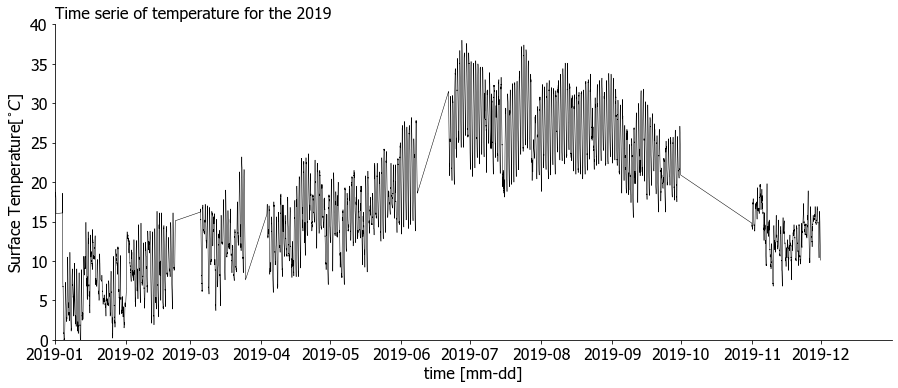

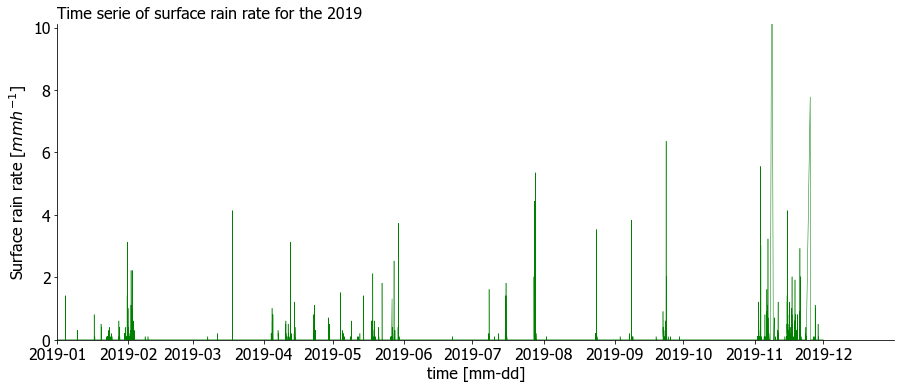

In [42]:
# plotting time series of the year
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import matplotlib
# reading single time series 
RR = RR_dataset_year['rain'].values
RR = RR.astype('float64')
time_RR = pd.to_datetime(RR_dataset_year['Timezone : Europe/Rome'].values) 
T = T_dataset_year['temperature'].values
T = T.astype('float64')
time_T = pd.to_datetime(T_dataset_year['Timezone : Europe/Rome'].values) 
P = P_dataset_year['pressure'].values
P = P.astype('float64')
time_P = pd.to_datetime(P_dataset_year['Timezone : Europe/Rome'].values) 
RH = RH_dataset_year['humidity'].values
RH = RH.astype('float64')
time_RH = pd.to_datetime(RH_dataset_year['Timezone : Europe/Rome'].values) 

labelsizeaxes   = 16
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_T, T, color='black', linewidth=0.5)
#ax.scatter(time_week, T_mean_week, color='black', s=200, label='weekly mean')
ax.set_ylim(0.,40.)                                          # limits of the y-axes 
#ax.legend(frameon=False)
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of temperature for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface Temperature[$^{\circ}C$]', fontsize=fontSizeY)
fig.savefig(pathFig+'surface_temperature_2019.png', format='png')

fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_P, P, color='blue', linewidth=0.5)
#ax.scatter(time_week, P_mean_week, color='blue', s=200, label='weekly mean')
ax.set_ylim(980.,1030.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of surface pressure for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
#ax.legend(frameon=False)
ax.set_ylabel('Surface pressure[hPa]', fontsize=fontSizeY)
fig.savefig(pathFig+'surface_pressure_2019.png', format='png')

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_RH, RH, color='red', linewidth=0.5)
#ax.scatter(time_week, RH_mean_week, color='red', s=200, label='weekly mean')
#ax.legend(frameon=False)

ax.set_ylim(20.,100.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of surface relative humidity for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface relative humidity [%]', fontsize=fontSizeY)
fig.savefig(pathFig+'surface_relative_humidity_2019.png', format='png')


# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_RR, RR, color='green', linewidth=0.5)
#ax.scatter(time_week, RR_mean_week, color='green', s=200, label='weekly mean')
#ax.legend(frameon=False)

ax.set_ylim(0.,10.1)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Time serie of surface rain rate for the 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Surface rain rate [$mmh^{-1}$]', fontsize=fontSizeY)
fig.savefig(pathFig+'surface_rain_rate_2019.png', format='png')


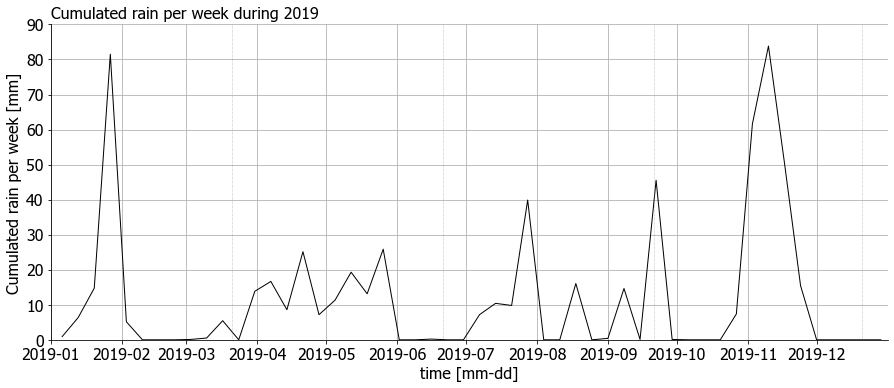

In [84]:
Nbins = 20
hist_RR_matrix = np.zeros((Nbins, len(time_week)-1))
cum_rain_week = np.zeros(len(time_week))
for itime in range(len(time_week)-1):
    timeStart = time_week[itime]
    if itime == len(time_week):
        timeEnd = datetime.datetime(2019,12,31,23,59,59)
    else:
        timeEnd = time_week[itime+1]
    
    #i_sel_T = np.where((time_T > timeStart) * (time_T <= timeEnd))
    #i_sel_P = np.where((time_P > timeStart) * (time_P <= timeEnd))
    #i_sel_RH = np.where((time_RH > timeStart) * (time_RH <= timeEnd))
    i_sel_RR = np.where((time_RR > timeStart) * (time_RR <= timeEnd))
    
    #T_sel = T[i_sel_T]
    #P_sel = P[i_sel_P]
    #RH_sel = RH[i_sel_RH]
    RR_sel = RR[i_sel_RR]
    
    cum_rain_week[itime] = np.nansum(RR_sel)
    hist, bin_edges = np.histogram(RR_sel, bins=Nbins, range=(0., 1.))
    hist_RR_matrix[:, itime] = hist
    
    if (len(~np.isfinite(T_sel)) > 0):
        T_mean_week[itime] = np.nanmean(T_sel)
        T_std_week[itime]  = np.nanstd(T_sel)
        T_max_week[itime]  = np.nanmax(T_sel)
        T_min_week[itime]  = np.nanmin(T_sel)
        
    
        

labelsizeaxes   = 16
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.grid()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_week, cum_rain_week, color='black', linewidth=1)

ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(0.,90.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Cumulated rain per week during 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Cumulated rain per week [mm]', fontsize=fontSizeY)
fig.savefig(pathFig+'cum_week_rain_2019.png', format='png')

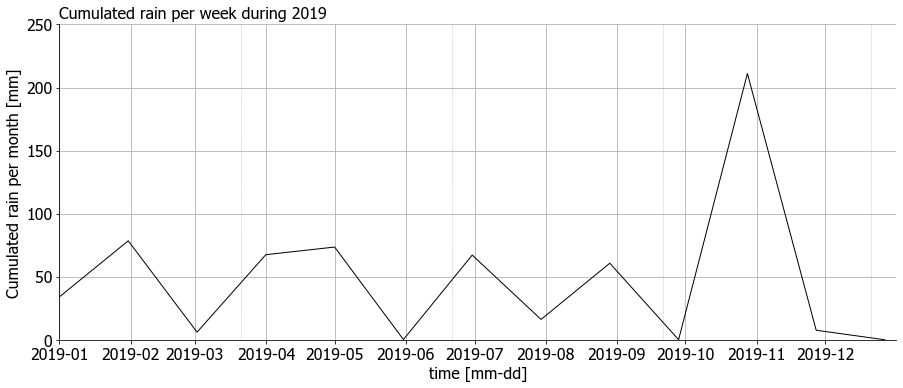

In [83]:
Nbins = 20
hist_RR_matrix_month = np.zeros((Nbins, len(time_mon)-1))
cum_rain_month = np.zeros(len(time_mon))
for itime in range(len(time_mon)-1):
    timeStart = time_mon[itime]
    if itime == len(time_mon):
        timeEnd = datetime.datetime(2019,12,31,23,59,59)
    else:
        timeEnd = time_mon[itime+1]
    
    #i_sel_T = np.where((time_T > timeStart) * (time_T <= timeEnd))
    #i_sel_P = np.where((time_P > timeStart) * (time_P <= timeEnd))
    #i_sel_RH = np.where((time_RH > timeStart) * (time_RH <= timeEnd))
    i_sel_RR = np.where((time_RR > timeStart) * (time_RR <= timeEnd))
    
    #T_sel = T[i_sel_T]
    #P_sel = P[i_sel_P]
    #RH_sel = RH[i_sel_RH]
    RR_sel = RR[i_sel_RR]
    
    cum_rain_month[itime] = np.nansum(RR_sel)
    hist, bin_edges = np.histogram(RR_sel, bins=Nbins, range=(0., 1.))
    hist_RR_matrix_month[:, itime] = hist

        
    
        

labelsizeaxes   = 16
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.grid()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_mon, cum_rain_month, color='black', linewidth=1)

ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(0.,250.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Cumulated rain per week during 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Cumulated rain per month [mm]', fontsize=fontSizeY)
fig.savefig(pathFig+'cum_month_rain_2019.png', format='png')

8760


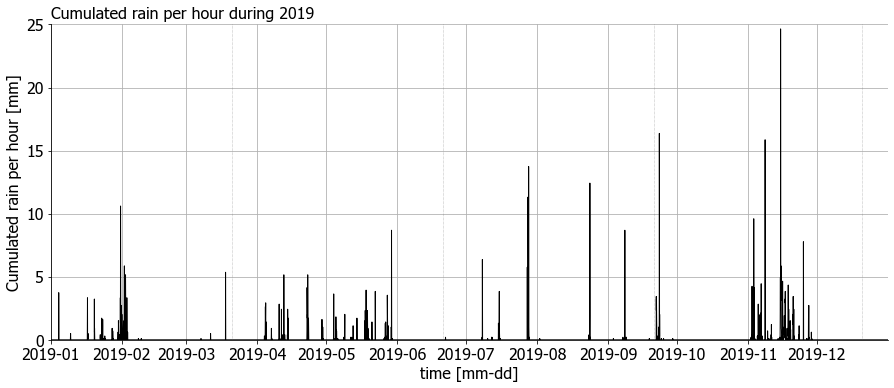

In [79]:
Nbins = 20
time_hour = pd.date_range(start=datetime.datetime(int(yyyy),1,1,0,0,0), \
                         end=datetime.datetime(int(yyyy),12,31,23,59,59), freq='1H')
print(len(time_hour))
hist_RR_matrix_hour = np.zeros((Nbins, len(time_hour)))
cum_rain_hour = np.zeros(len(time_hour))
for itime in range(len(time_hour)-1):
    timeStart = time_hour[itime]
    if itime == len(time_hour):
        timeEnd = datetime.datetime(2019,12,31,23,59,59)
    else:
        timeEnd = time_hour[itime+1]
        
    #i_sel_T = np.where((time_T > timeStart) * (time_T <= timeEnd))
    #i_sel_P = np.where((time_P > timeStart) * (time_P <= timeEnd))
    #i_sel_RH = np.where((time_RH > timeStart) * (time_RH <= timeEnd))
    i_sel_RR = np.where((time_RR > timeStart) * (time_RR <= timeEnd))
    
    #T_sel = T[i_sel_T]
    #P_sel = P[i_sel_P]
    #RH_sel = RH[i_sel_RH]
    RR_sel = RR[i_sel_RR]
    
    cum_rain_hour[itime] = np.nansum(RR_sel)
    hist, bin_edges = np.histogram(RR_sel, bins=Nbins, range=(0., 1.))
    hist_RR_matrix_hour[:, itime] = hist

        
    
        

labelsizeaxes   = 16
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
fig, ax         = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)

# subplot of correction terms along z and mdv to check the time shift
ax              = plt.subplot(1,1,1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
matplotlib.rc('xtick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=labelsizeaxes)  # sets dimension of ticks in the plots
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%"))
ax.xaxis_date()
ax.grid()
ax.tick_params(which = 'both', direction = 'out')
ax.plot(time_hour, cum_rain_hour, color='black', linewidth=1)

ax.axvline(datetime.datetime(2019,3,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,6,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,9,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.axvline(datetime.datetime(2019,12,21,0,0,0), 0., 1., linestyle=':', linewidth=0.5, color='grey')
ax.set_ylim(0.,25.)                                          # limits of the y-axes 
ax.set_xlim([pd.to_datetime(datetime.datetime(2019,1,1,0,0,0)), pd.to_datetime(datetime.datetime(2019,12,31,23,59,59))])                             # limits of the x-axes
ax.set_title('Cumulated rain per hour during 2019', fontsize=fontSizeTitle, loc='left')
ax.set_xlabel("time [mm-dd]", fontsize=fontSizeX)
ax.set_ylabel('Cumulated rain per hour [mm]', fontsize=fontSizeY)
fig.savefig(pathFig+'cum_hour_rain_2019.png', format='png')

In [29]:
# saving in a unique dataset 
 # save xarray dataset containing the correction terms for the hour
dimt              = ['time']

coords            = {"time":time_res}

T                 = xr.DataArray(dims=dimt, coords=coords, data=T_dataset['temperature'].values,
                         attrs={'long_name':'Surface temperature',
                                'units':'Degrees Celsius'})
P                 = xr.DataArray(dims=dimt, coords=coords, data=P_dataset['pressure'].values,
                         attrs={'long_name':'Surface pressure',
                                'units':'Hpa'})
RH                 = xr.DataArray(dims=dimt, coords=coords, data=RH_dataset['humidity'].values,
                         attrs={'long_name':'Surface relative humidity',
                                'units':'%'})
RR                 = xr.DataArray(dims=dimt, coords=coords, data=RR_dataset['rain rate'].values,
                         attrs={'long_name':'Surface rain rate',
                                'units':'mm/h'})        
            
variables         = {'T':T,
                     'P':P, 
                     'RH': RH, 
                     'RR': RR}
global_attributes = {'CREATED_BY'       : 'Claudia Acquistapace',
                    'CREATED_ON'       :  str(datetime.now()),
                    'FILL_VALUE'       :  'NaN', 
                    'PI_NAME'          : 'Claudia Acquistapace',
                    'PI_AFFILIATION'   : 'University of Cologne (UNI), Germany', 
                    'PI_ADDRESS'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50969 Koeln', 
                    'PI_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DO_NAME'          : 'University of Cologne - Germany',
                    'DO_AFFILIATION'   : 'University of Cologne - Germany',
                    'DO_address'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50696 Koeln',
                    'DO_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DS_NAME'          : 'University of Cologne - Germany',
                    'DS_AFFILIATION'   : 'University of Cologne - Germany',
                    'DS_address'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50696 Koeln',
                    'DS_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DATA_DESCRIPTION' : 'data from Netatmo weather station',
                    'DATA_DISCIPLINE'  : 'Atmospheric Physics - ground-based weather station',
                    'DATA_GROUP'       : 'Experimental;in situ;static',
                    'DATA_LOCATION'    : 'Santa Luce, Pisa, Italy',
                    'DATA_SOURCE'      : '',
                    'DATA_PROCESSING'  : '',
                    'INSTRUMENT_MODEL' : 'weather station NETATMO',
                     'COMMENT'         : 'data post processed using python 3 script' }
netatmo_data      = xr.Dataset(data_vars = variables,
                                  coords = coords,
                                   attrs = global_attributes)
            


<xarray.Dataset>
Dimensions:                 (time: 75642)
Coordinates:
    index                   (time) int64 0 1 2 3 4 ... 8569 8570 8571 8572 8573
  * time                    (time) datetime64[ns] 2019-01-01T00:02:14 ... 201...
Data variables:
    Timezone : Europe/Rome  (time) object '2019/01/01 00:02:14' ... '2019/11/...
    temperature             (time) object 19.9 19.9 19.9 19.8 ... 10.1 10.1 10.1

In [18]:
# alc

[<xarray.Dataset>
 Dimensions:                 (time: 75642)
 Coordinates:
     index                   (time) int64 0 1 2 3 4 ... 8569 8570 8571 8572 8573
   * time                    (time) datetime64[ns] 2019-01-01T00:02:14 ... 201...
 Data variables:
     Timezone : Europe/Rome  (time) object '2019/01/01 00:02:14' ... '2019/11/...
     temperature             (time) object 19.9 19.9 19.9 19.8 ... 10.1 10.1 10.1,
 <xarray.Dataset>
 Dimensions:                 (time: 75994)
 Coordinates:
     index                   (time) int64 0 1 2 3 4 ... 8588 8589 8590 8591 8592
   * time                    (time) datetime64[ns] 2019-01-01T00:02:46 ... 201...
 Data variables:
     Timezone : Europe/Rome  (time) object '2019/01/01 00:02:46' ... '2019/11/...
     pressure                (time) object 1.025e+03 1.025e+03 ... 1.018e+03,
 <xarray.Dataset>
 Dimensions:                 (time: 75642)
 Coordinates:
     index                   (time) int64 0 1 2 3 4 ... 8569 8570 8571 8572 8573
   * time

In [149]:
# calculating daily, weekly, monthly means of all variables
time_week = pd.date_range(start=datetime.datetime(int(yyyy),1,6,0,0,0), \
                         end=datetime.datetime(int(yyyy),12,31,23,59,59), freq='7d')
time_day = pd.date_range(start=datetime.datetime(int(yyyy),1,1,0,0,0), \
                         end=datetime.datetime(int(yyyy),12,31,23,59,59), freq='1d')
time_month = pd.date_range(start=datetime.datetime(int(yyyy),1,1,0,0,0), \
                         end=datetime.datetime(int(yyyy),12,31,23,59,59), freq='30d')
netatmo_data


<xarray.Dataset>
Dimensions:      (time: 6307200)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-01 ... 2019-12-31T23:59:55
Data variables:
    temperature  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pressure     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    humidity     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    rain         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [192]:
netatmo_data_week = []
T_serie = []
P_serie = []
RH_serie = []
RR_serie = []
for indTime in range(len(time_week)-1):
    print(str(time_week[indTime])[0:10])
    print(str(time_week[indTime+1])[0:10])
    netatmo_data_week = netatmo_data.sel(time=slice(str(time_week[indTime])[0:10],\
                                                         str(time_week[indTime+1])[0:10]))
    print(netatmo_data_week)
    T_serie.append(np.nanmean(netatmo_data_week.temperature.values))
    print(np.nanmean(netatmo_data_week.temperature.values))
    print(netatmo_data_week.temperature.values)
    #P_serie.append(netatmo_data_week[indTime].pressure.values)
    #RH_serie.append(netatmo_data_week[indTime].humidity.values)
    #RR_serie.append(netatmo_data_week[indTime].rain.values)

2019-01-06
2019-01-13
<xarray.Dataset>
Dimensions:      (time: 138240)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-06 ... 2019-01-13T23:59:55
Data variables:
    temperature  (time) float64 4.089 4.086 4.082 4.079 ... 9.0 9.0 9.0 9.0
    pressure     (time) float64 1.013e+03 1.013e+03 1.013e+03 ... 1e+03 1e+03
    humidity     (time) float64 74.06 74.07 74.09 74.1 ... 78.0 78.0 78.0 78.0
    rain         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
5.00671276744765
[4.08896104 4.08571429 4.08246753 ... 9.         9.         9.        ]
2019-01-13
2019-01-20
<xarray.Dataset>
Dimensions:      (time: 138240)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-13 ... 2019-01-20T23:59:55
Data variables:
    temperature  (time) float64 2.9 2.9 2.9 2.9 2.9 ... 7.702 7.702 7.702 7.702
    pressure     (time) float64 1.009e+03 1.009e+03 ... 1.007e+03 1.007e+03
    humidity     (time) float64 73.0 73.0 73.0 73.0 ... 73.03 73.03 73.03 73.03
    rain      

<ipython-input-192-7be92e54fb21>:12: RuntimeWarning: Mean of empty slice
  T_serie.append(np.nanmean(netatmo_data_week.temperature.values))
<ipython-input-192-7be92e54fb21>:13: RuntimeWarning: Mean of empty slice
  print(np.nanmean(netatmo_data_week.temperature.values))



nan
[nan nan nan ... nan nan nan]
2019-07-21
2019-07-28
<xarray.Dataset>
Dimensions:      (time: 138240)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-21 ... 2019-07-28T23:59:55
Data variables:
    temperature  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pressure     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    humidity     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    rain         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
nan
[nan nan nan ... nan nan nan]
2019-07-28
2019-08-04
<xarray.Dataset>
Dimensions:      (time: 138240)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-28 ... 2019-08-04T23:59:55
Data variables:
    temperature  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pressure     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    humidity     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    rain         (time)

In [190]:
T_serie

[5.00671276744765,
 8.985035796371303,
 5.962462710567678,
 5.989606069933878,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [165]:
#netatmo_data.sel(time=slice('2019-01-06', '2019-01-13')).mean()
#netatmo_data.sel(time=slice(str(time_week[indTime])[0:10],str(time_week[indTime+1])[0:10]))
T_week = netatmo_data_week

MergeError: conflicting values for variable 'temperature' on objects to be combined. You can skip this check by specifying compat='override'.

In [140]:
plt.plot()

numpy.datetime64('2019-01-01T00:00:00.000000000')

In [63]:
first_sheet_gen_mar = book_gen_mar.sheet_by_index(0)
time_gen_mar = first_sheet_gen_mar.col_values(0)
rain_gen_mar = first_sheet_gen_mar.col_values(1)

# removing first three elements
time_gen_mar = time_gen_mar[3:-1]
rain_gen_mar = rain_gen_mar[3:-1]

datetime_arr_gen_mar = []
for ind in range(len(time)):
    datetime_arr.append(datetime.strptime(time_gen_mar[ind], '%Y/%m/%d %H:%M:%S'))
    if rain_gen_mar[ind] == 0.0:
        rain_gen_mar[ind] = np.nan

NameError: name 'book_gen_mar' is not defined

In [6]:
first_sheet_apr_giu = book_apr_giu.sheet_by_index(0)
time_apr_giu = first_sheet_apr_giu.col_values(0)
rain_apr_giu = first_sheet_apr_giu.col_values(1)

# removing first three elements
time_apr_giu = time_apr_giu[3:-1]
rain_apr_giu = rain_apr_giu[3:-1]

datetime_arr_apr_giu = []
for ind in range(len(time_apr_giu)):
    datetime_arr_apr_giu.append(datetime.strptime(time_apr_giu[ind], '%Y/%m/%d %H:%M:%S'))


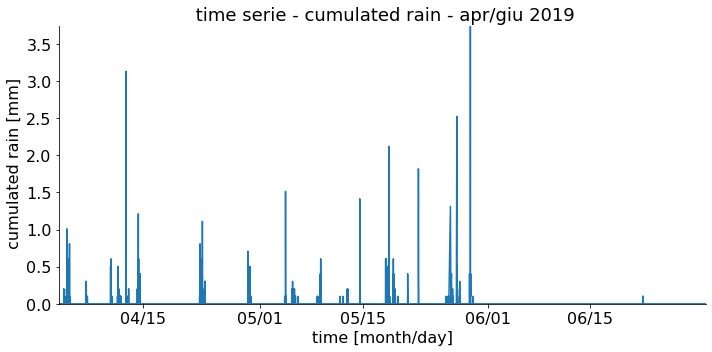

In [8]:
# plot time serie for 3 months
fig, ax = plt.subplots(figsize=(10,5))
label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.ylim(0., np.nanmax(rain_apr_giu))
plt.title(' time serie - cumulated rain - apr/giu 2019', fontsize=18)
plt.ylabel(' cumulated rain [mm]', fontsize=16)
plt.xlabel('time [month/day]', fontsize=16)
plt.xlim(datetime_arr_apr_giu[0],datetime_arr_apr_giu[-1])
plt.plot(datetime_arr_apr_giu, rain_apr_giu)
fig.tight_layout()
plt.savefig('timeSerie_prec_apr_giu_2019.png')



for ind in range(len(datetime_arr_apr_giu)):
    if rain_apr_giu[ind] == 0.0:
        rain_apr_giu[ind] = np.nan

2019-04-03 12:21:56
2019-05-01 00:00:00
2019-06-30 17:46:42


/Users/cacquist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


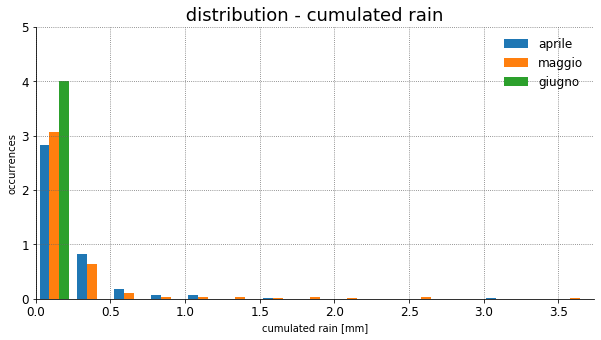

In [24]:
import pandas as pd
rain_DF = pd.DataFrame(rain_apr_giu, index=datetime_arr_apr_giu)
dateStart1 = datetime_arr_apr_giu[0]
dateEnd1   = datetime(2019,5,1,0,0,0)
DF_sliced_1 = rain_DF.loc[(rain_DF.index>dateStart1) * (rain_DF.index<dateEnd1)]
dateStart2 = datetime(2019,5,1,0,0,0)
dateEnd2   = datetime(2019,6,1,0,0,0)
DF_sliced_2 = rain_DF.loc[(rain_DF.index>dateStart2) * (rain_DF.index<dateEnd2)]
dateStart3 = datetime(2019,6,1,0,0,0)
dateEnd3   = datetime(2019,7,1,0,0,0)
DF_sliced_3 = rain_DF.loc[(rain_DF.index>dateStart3) * (rain_DF.index<dateEnd3)]

x = [DF_sliced_1.values, DF_sliced_2.values, DF_sliced_3.values]
legendArr = ['aprile','maggio', 'giugno']
print(dateStart1)
print(dateEnd1)
print(datetime_arr_apr_giu[-1])

nbins = 15
ymax  = 5.
xmax  = np.nanmax(rain_apr_giu)
xmin  = 0.
# plot monthly distributions
fig, ax = plt.subplots(figsize=(10,5))
label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
matplotlib.rc('xtick', labelsize=12)                        # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=12)                        # sets dimension of ticks in the plots
ax.set_ylabel('occurrences')
ax.set_xlabel('cumulated rain [mm]')
plt.title(' distribution - cumulated rain ', fontsize=18)

    #ax.ylim(ymax)
plt.ylim(0.,ymax)
plt.xlim(xmin, xmax)
plt.grid(b=True, which='major', color='#666666', linestyle=':')
plt.hist(x, bins=nbins, normed=True, histtype='bar', range=[xmin, xmax], label=legendArr)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.savefig('distributions_apr_giu_2019.png')


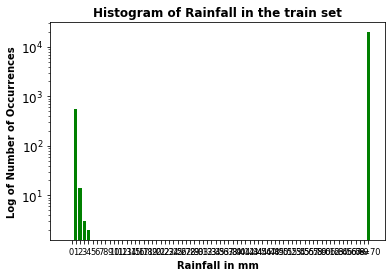

In [9]:

# Importing the necessary modules #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_exp = rain

# Create bins on rainfall for 0mm, 1mm, 2mm,....69mm, >=70mm #
rain_bins_list = [-1] + list( range(70) ) + [max(train_exp)+1]
dig_RR1 = np.digitize(train_exp, rain_bins_list, right=True)
dig_RR1 = dig_RR1-1     # subtracting by 1 to have the pythonic index for digitized values

# plot a histogram on the log count of occurrences #
hist_bins = [-1]+list( range(max(dig_RR1)+2) )
n, bins, patches = plt.hist(dig_RR1, hist_bins, histtype='bar', rwidth=0.8, log=True, align='left', color='green')

# Change the x ticks and use a custom name #
name = [str(i) for i in range(max(dig_RR1))]+['>=70']
xticks = plt.xticks(range(max(dig_RR1)+1), name, size='small')

# Set the title and labels for plot #
plt.title("Histogram of Rainfall in the train set", fontsize="large", fontweight="bold")
plt.xlabel("Rainfall in mm", fontsize="medium", fontweight="bold")
plt.ylabel("Log of Number of Occurrences", fontsize="medium", fontweight="bold")
plt.savefig("output.png")
plt.show()


In [18]:
datetime(2019,1,31,0,0,0)

datetime.datetime(2019, 1, 31, 0, 0)

In [ ]:
np.shape(time)

In [40]:
rain


[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0